In [1]:
import numpy as np
import networkx as nx
import math
import matplotlib.pyplot as plt
import glob
import math
import csv
import pandas as pd
from __future__ import division
%matplotlib inline
import random
import itertools as it
import multiprocessing as mp

In [2]:
def sinRough (y, ny, alpha, delta):
    return (BoxMaxX - alpha*(BoxMaxX - BoxErode)/2) + alpha*((BoxMaxX - BoxErode)/2)*np.sin(2*np.pi*ny*(y - delta)/L )

# Read Files

In [3]:
config = np.loadtxt("./wall1newThickDone.dat")
config2 = np.loadtxt("./wall1newThickDone.dat")
configWater = np.loadtxt("./createConfigFlat/droplet_without_wall_config_sorted_7col_fixCol1.dat")

# Definitions

In [4]:
#wall definitions
WallLayer = 8.0828

WallMaxX = max(config[:,4])
WallMinX = min(config[:,4])
WallMaxY = max(config[:,5])
WallMinY = min(config[:,5])
WallMaxZ = max(config[:,6])
WallMinZ = min(config[:,6])
WallErode = WallMaxX - 2*WallLayer
L = 34.029510 +34.029510

WallDx = WallMaxX - WallMinX
WallDy = WallMaxY - WallMinY
WallDz = WallMaxZ - WallMinZ
#Box definitions
eps = 0.02
BoxMaxX = WallMaxX + eps
BoxMinX = WallMinX - eps
BoxMaxY = WallMaxY + eps
BoxMinY = WallMinY - eps
BoxMaxZ = WallMaxZ + eps
BoxMinZ = WallMinZ - eps
BoxErode = WallErode - eps
print(BoxMaxY)

BoxDx = BoxMaxX - BoxMinX
BoxDy = BoxMaxY - BoxMinY
BoxDz = BoxMaxZ - BoxMinZ


#New Simulation Box


WaterMaxX = max(configWater[:,4])
WaterMinX = min(configWater[:,4])
WaterMaxY = max(configWater[:,5])
WaterMinY = min(configWater[:,5])
WaterMaxZ = max(configWater[:,6])
WaterMinZ = min(configWater[:,6])

68.07903


In [5]:
WaterMinX

-58.08780828627713

# Configuration wall flat 

In [6]:
# newConfigWall = []
# newIndex = 1
# for i in config:
#     x = i[4]
#     y = i[5]
#     z = i[6]
#     if( (y > WallMinY - eps) and ( z > WallMinZ - eps)):
#         if((y < 0) and (z < 0)):    
#             i[0] = newIndex
#             i[5] = i[5] + abs(WallMinY/2) 
#             i[6] = i[6] + abs(WallMinZ/2) 
#             newConfigWall.append(list(i))
#             newIndex +=1
#         else:
#             continue
#     else:
#         continue    
# totNewWallAtoms = len(newConfigWall)
# #New simulation box
# Lnx = 70
# Lny = max(np.array(newConfigWall)[:,5]) - min(np.array(newConfigWall)[:,5])
# Lnz = max(np.array(newConfigWall)[:,6]) - min(np.array(newConfigWall)[:,6])
# print(Lnx, Lny, Lnz)
CONFIGWALL = []
newIndex = 1
for i in config2:
    x = i[4]
    y = i[5]
    z = i[6]
    if( (y > WallMinY - eps) and ( z > WallMinZ - eps)):
        if((y < 0) and (z < 0)):    
            i[0] = newIndex
            i[5] = i[5] + abs(WallMinY/2) 
            i[6] = i[6] + abs(WallMinZ/2) 
            CONFIGWALL.append(list(i))
            newIndex +=1
        else:
            continue
    else:
        continue    
totCONFIGWALL = len(CONFIGWALL)


# Configuration Rough sin Wall

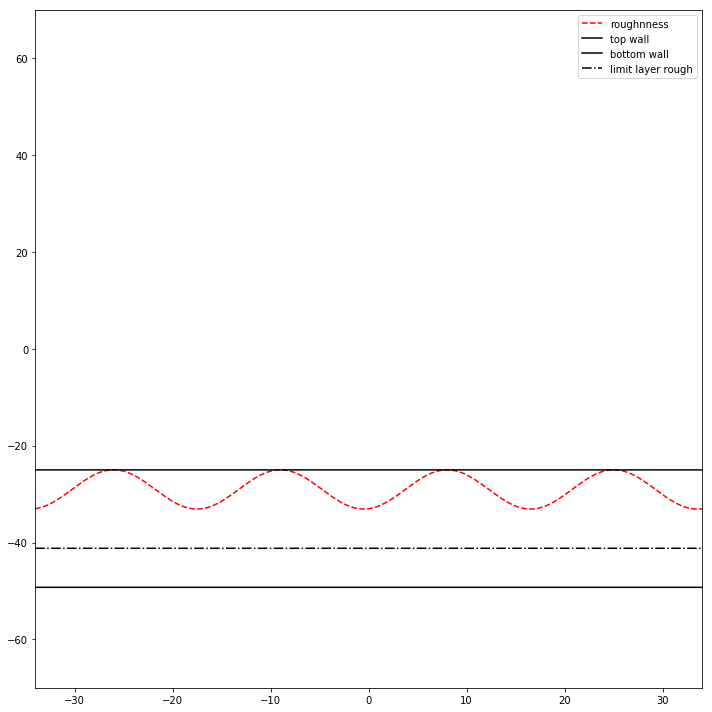

In [7]:
alpha =0.5
nz = ny = 4
delta = 3.75
x=np.arange(-L/2,L/2, 0.01)
y=sinRough(x, ny, alpha, delta)
plt.figure(figsize=(10,10))
plt.plot(x, y , '--r', label = 'roughnness')
plt.plot(x, np.asarray([   WallMaxX       for i in range(len(x))]), 'k', label = 'top wall')
plt.plot(x, np.asarray([   WallMinX    for i in range(len(x))]), 'k', label = 'bottom wall')
plt.plot(x, np.asarray([BoxErode for i in range(len(x))]), 'k-.', label = 'limit layer rough')
plt.ylim(-70,70)
plt.xlim(-L/2,L/2)
plt.legend()
plt.tight_layout()

In [8]:
newConfigWall = []
newIndex = 1
for i in config:
    x = i[4]
    y = i[5]
    z = i[6]
    if( (y > WallMinY - eps) and ( z > WallMinZ - eps)):
        #if((y < -1.24) and (z < -0.722)):
        if((y < 0) and (z < 0)):
            if(x < sinRough(y, ny, alpha, delta)):
                i[0] = newIndex
                i[5] = i[5] + abs(WallMinY/2) 
                i[6] = i[6] + abs(WallMinZ/2) 
                newConfigWall.append(list(i))
                newIndex +=1
            else:
                continue
        else:
            continue
    else:
        continue    
totNewWallAtoms = len(newConfigWall)
#New simulation box
Lnx = 70
Lny = max(np.array(newConfigWall)[:,5]) - min(np.array(newConfigWall)[:,5])
Lnz = max(np.array(newConfigWall)[:,6]) - min(np.array(newConfigWall)[:,6])
print(Lnx, Lny, Lnz)

70 68.05902 68.57812


# Water config

In [9]:
len(newConfigWall)

6824

In [10]:
configWater[:3]

array([[ 1.00000000e+00,  1.16490000e+04,  1.00000000e+00,
         4.23800000e-01, -5.40939046e+01,  1.64153674e+01,
        -2.29670805e+01],
       [ 2.00000000e+00,  1.16490000e+04,  2.00000000e+00,
        -8.47600000e-01, -5.31211375e+01,  1.66193667e+01,
        -2.28570361e+01],
       [ 3.00000000e+00,  1.16490000e+04,  1.00000000e+00,
         4.23800000e-01, -5.29283229e+01,  1.75304155e+01,
        -2.32214707e+01]])

In [11]:
configO  = []
configH1 = []
configH2 = []
for i in list(range(0,len(configWater),3)):
    configH1.append(list(configWater[i]))
    configO.append(list(configWater[i+1]))
    configH2.append(list(configWater[i+2]))


In [12]:
configO[:3]

[[2.0,
  11649.0,
  2.0,
  -0.8476,
  -53.1211374550065,
  16.619366655222333,
  -22.857036140383283],
 [5.0,
  11650.0,
  2.0,
  -0.8476,
  -15.753603246001418,
  -5.973387154626275,
  -13.957703516537174],
 [8.0,
  11651.0,
  2.0,
  -0.8476,
  -54.30412753289187,
  8.01490945306157,
  -15.518945854016964]]

In [13]:
configH1[:3]

[[1.0,
  11649.0,
  1.0,
  0.4238,
  -54.09390458547503,
  16.415367433633303,
  -22.967080487709083],
 [4.0,
  11650.0,
  1.0,
  0.4238,
  -16.169603880599205,
  -6.881963697150912,
  -13.995547182122193],
 [7.0,
  11651.0,
  1.0,
  0.4238,
  -53.50817136105885,
  7.563377026773307,
  -15.922148796104443]]

In [14]:
configH2[:3]

[[3.0,
  11649.0,
  1.0,
  0.4238,
  -52.92832287453134,
  17.530415510626934,
  -23.221470740064508],
 [6.0,
  11650.0,
  1.0,
  0.4238,
  -16.46021038367019,
  -5.290771633446019,
  -13.771310277073326],
 [9.0,
  11651.0,
  1.0,
  0.4238,
  -54.02075063677572,
  8.53062840698031,
  -14.71040877065987]]

In [15]:
newConfigWater = []
indexAtomWater = totNewWallAtoms + 1
indexMolWater = 2
for i in list(range(len(configO))):
                           #atom index    mol index      type           charge     posx       posy       posz                         
    newConfigWater.append([indexAtomWater,indexMolWater, configO[i][2], configO[i][3],   configO[i][4] + abs(WaterMinX) + WallMaxX + 3,  configO[i][5],  configO[i][6]])
    indexAtomWater+=1 
    newConfigWater.append([indexAtomWater,indexMolWater,configH1[i][2], configH1[i][3], configH1[i][4] + abs(WaterMinX) + WallMaxX + 3, configH1[i][5], configH1[i][6]])
    indexAtomWater+=1
    newConfigWater.append([indexAtomWater,indexMolWater,configH2[i][2], configH2[i][3], configH2[i][4] + abs(WaterMinX) + WallMaxX + 3, configH2[i][5], configH2[i][6]])
    indexAtomWater+=1
    indexMolWater +=1


In [16]:
newConfigWater[:3]

[[6825,
  2,
  2.0,
  -0.8476,
  -17.033329168729367,
  16.619366655222333,
  -22.857036140383283],
 [6826,
  2,
  1.0,
  0.4238,
  -18.0060962991979,
  16.415367433633303,
  -22.967080487709083],
 [6827,
  2,
  1.0,
  0.4238,
  -16.84051458825421,
  17.530415510626934,
  -23.221470740064508]]

In [17]:
newConfigWaterBonds = []
countBound = 1
for i in list(range(0,len(newConfigWater),3)):
                                             #Oxygen               Hydrogen
    newConfigWaterBonds.append([countBound,1,newConfigWater[i][0], newConfigWater[i+1][0]])
    countBound+=1
    newConfigWaterBonds.append([countBound,1,newConfigWater[i][0], newConfigWater[i+2][0]])
    countBound+=1

In [18]:
len(newConfigWaterBonds)

6750

In [19]:
newConfigWaterBonds[0]

[1, 1, 6825, 6826]

In [20]:
newConfigWaterAngle = []
countAngle = 1
for i in list(range(0,len(newConfigWater),3)):
                                             #Oxygen               Hydrogen
    newConfigWaterAngle.append([countAngle, 1, newConfigWater[i+1][0],newConfigWater[i][0], newConfigWater[i+2][0]])
    countAngle+=1


In [21]:
len(newConfigWaterAngle)

3375

In [22]:

####HERE UP WALL

newConfigWallUp = []
indexWallUp = indexAtomWater
indexWallMolUp = indexMolWater 

#for i in newConfigWall:                         
for i in CONFIGWALL:                             
    newConfigWallUp.append([indexWallUp, indexWallMolUp, i[2], i[3], i[4] + abs(WaterMaxX - WaterMinX) + (WallMaxX - WallMinX ) + 3 + 3, i[5], i[6]])
    indexWallUp+=1

    
    
    
    

# Join Water and Wall configuration

In [23]:
with open('./createConfigFlat/1flat1roughSinWallsplusWater.data', "w") as configRough:
    configRough.write('Flat wall plus 3375 water\n\n')
    configRough.write('%d atoms\n' % (totNewWallAtoms + len(newConfigWater) + len(newConfigWallUp) ))
    configRough.write('4 atom types\n')
    configRough.write('%d bonds\n' % (len(newConfigWaterBonds)))
    configRough.write('1 bond types\n')    
    configRough.write('%d angles\n' % (len(newConfigWaterAngle)))
    configRough.write('1 angle types\n')
    configRough.write('\n')    
    
    configRough.write('%f %f xlo xhi\n' % (-Lnx, Lnx))
    configRough.write('%f %f ylo yhi\n' % (-Lny/2, Lny/2))
    configRough.write('%f %f zlo zhi\n' % (-Lnz/2, Lnz/2))
    configRough.write('\n')    
    
    configRough.write('Masses\n\n')
    configRough.write('1 1.008\n')
    configRough.write('2 15.9994\n')
    configRough.write('3 1\n')
    configRough.write('4 1\n')
    configRough.write('\n')  
    
    configRough.write('Pair Coeffs\n\n')  
    configRough.write('1 0 0\n')  
    configRough.write('2 0.1553 3.166\n')  
    configRough.write('3 0 0\n')      
    configRough.write('4 0 0\n')      
    configRough.write('\n')      
    
    configRough.write('Bond Coeffs\n\n')      
    configRough.write('1 450 1\n\n')  

    configRough.write('Angle Coeffs\n\n')      
    configRough.write('1 450 109.47 0 0\n')          
    configRough.write('\n')      
    
    configRough.write('Atoms\n\n')    
    for i in newConfigWall:
        configRough.write('%d %d %d %f %f %f %f\n' % (i[0], i[1], i[2], i[3], i[4], i[5], i[6]))
    for i in newConfigWater:
        configRough.write('%d %d %d %f %f %f %f\n' % (i[0], i[1], i[2], i[3], i[4], i[5], i[6]))
    for i in newConfigWallUp:
        configRough.write('%d %d %d %f %f %f %f\n' % (i[0], i[1], i[2], i[3], i[4], i[5], i[6]))    
    configRough.write('\n')     
        
    configRough.write('Velocities\n\n')    
    for i in range(totNewWallAtoms + len(newConfigWater) +len(newConfigWallUp)):
        configRough.write('%d 0.0 0.0 0.0 \n' % (i+1))    
    configRough.write('\n')      
                          
    configRough.write('Bonds\n\n')    
    for i in newConfigWaterBonds:
        configRough.write('%d %d %d %d\n' % (i[0], i[1], i[2], i[3]))                              
    configRough.write('\n')      
    
    configRough.write('Angles\n')    
    for i in newConfigWaterAngle:
        configRough.write('\n')    
        configRough.write('%d %d %d %d %d' % (i[0], i[1], i[2], i[3], i[4]))                              
                          
configRough.close()    



In [47]:
15/0.1


150.0

In [23]:
# with open('./createConfigFlat/continuation-bridge-k00-onlywall_flat_smaller.data', "w") as configRough:
#     newIndex = 1
#     for i in config:
#         x = i[4]
#         y = i[5]
#         z = i[6]
#         if( (abs(y) < Lny/2) and (abs(z) < Lnz/2) ):
#             newIndex +=1
#         else:
#             continue    
#     configRough.write('LAMMPS data file\n')
#     configRough.write('%d atoms\n' % (newIndex - 1))
#     configRough.write('2 bonds\n')
#     configRough.write('0 angles\n')
#     configRough.write('5 atom types\n')
#     configRough.write('0 bond types\n')
#     configRough.write('1 angle types\n')
#     configRough.write('-35.0 35.0 xlo xhi\n')
#     configRough.write('-35.0 35.0 ylo yhi\n')
#     configRough.write('-70.0 70.0 zlo zhi\n')
#     configRough.write('\n')    
#     configRough.write('Masses\n\n')
#     configRough.write('1 1.008\n')
#     configRough.write('2 15.9994\n')
#     configRough.write('3 1\n')
#     configRough.write('4 1\n')
#     configRough.write('5 1.008\n')
#     configRough.write('\n')  
#     configRough.write('Atoms\n\n')    
#     newIndex = 1
#     for i in config:
#         x = i[4]
#         y = i[5]
#         z = i[6]
#         if((abs(y) < Lny/2) and (abs(z) < Lnz/2)):
#             configRough.write('%d %d %d %f %f %f %f\n' % (newIndex, i[1], i[2], i[3], i[4], i[5], i[6]))
#             newIndex +=1
#         else:
#             continue
# configRough.close()    



In [24]:
# with open('./createConfigFlat/continuation-bridge-k00-onlywall_flat_smaller.data', "w") as configRough:
#     newIndex = 1
#     for i in config:
#         x = i[4]
#         y = i[5]
#         z = i[6]
#         if( (abs(y) < Lny/2) and (abs(z) < Lnz/2) ):
#             newIndex +=1
#         else:
#             continue    
#     configRough.write('LAMMPS data file\n')
#     configRough.write('%d atoms\n' % (newIndex - 1))
#     configRough.write('2 bonds\n')
#     configRough.write('0 angles\n')
#     configRough.write('5 atom types\n')
#     configRough.write('0 bond types\n')
#     configRough.write('1 angle types\n')d
#     configRough.write('-35.0 35.0 xlo xhi\n')
#     configRough.write('-35.0 35.0 ylo yhi\n')
#     configRough.write('-70.0 70.0 zlo zhi\n')
#     configRough.write('\n')    
#     configRough.write('Masses\n\n')
#     configRough.write('1 1.008\n')
#     configRough.write('2 15.9994\n')
#     configRough.write('3 1\n')
#     configRough.write('4 1\n')
#     configRough.write('5 1.008\n')
#     configRough.write('\n')  
#     configRough.write('Atoms\n\n')    
#     newIndex = 1
#     for i in config:
#         x = i[4]
#         y = i[5]
#         z = i[6]
#         if((abs(y) < Lny/2) and (abs(z) < Lnz/2)):
#             configRough.write('%d %d %d %f %f %f %f\n' % (newIndex, i[1], i[2], i[3], i[4], i[5], i[6]))
#             newIndex +=1
#         else:
#             continue
# configRough.close()    



In [7]:
# with open('./continuation-bridge-k00-onlywall_rough_sin.data', "w") as configRough:
#     newIndex = 1
#     for i in config:
#         x = i[4]
#         y = i[5]
#         if(x < sinRough(y, ny, alpha, delta)):
#             newIndex +=1
#         else:
#             continue    
#     configRough.write('LAMMPS data file\n')
#     configRough.write('%d atoms\n' % (newIndex - 1))
#     configRough.write('2 bonds\n')
#     configRough.write('0 angles\n')
#     configRough.write('5 atom types\n')
#     configRough.write('0 bond types\n')
#     configRough.write('1 angle types\n')
#     configRough.write('-70.0 70.0 xlo xhi\n')
#     configRough.write('-70.0 70.0 ylo yhi\n')
#     configRough.write('-70.0 70.0 zlo zhi\n')
#     configRough.write('\n')    
#     configRough.write('Masses\n\n')
#     configRough.write('1 1.008\n')
#     configRough.write('2 15.9994\n')
#     configRough.write('3 1\n')
#     configRough.write('4 1\n')
#     configRough.write('5 1.008\n')
#     configRough.write('\n')  
#     configRough.write('Atoms\n\n')    
#     newIndex = 1
#     for i in config:
#         x = i[4]
#         y = i[5]
#         if(x < sinRough(y, ny, alpha, delta)):
#             configRough.write('%d %d %d %f %f %f %f\n' % (newIndex, i[1], i[2], i[3], i[4], i[5], i[6]))
#             newIndex +=1
#         else:
#             continue
# configRough.close()    

